In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

En resumen se puede hacer Bagging de cualquier modelo de clasificación de SKLEARN únicamente con la siguiente línea de código:

```Python
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
BaggingClassifier(base_estimator=estimator, n_estimators=30)
```

De esta simple manera convertimos un clasificador base a un ensamble de ellos, en este caso han sido 30.

Comparemos varios modelos en su versión normal y en su versión Bagging:


Importamos librerias:


In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

Leemos nuestro dataset y lo particionamos:


In [3]:
df_heart = pd.read_csv("../data/heart.csv")

print(df_heart["target"].describe())
print("=" * 64)

X = df_heart.drop(["target"], axis=1)
y = df_heart["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64


Instanciamos nuestros modelos:


In [4]:
classifiers = {
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "LinearSCV": LinearSVC(),
    "SVC": SVC(),
    "SGDC": SGDClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
}

Corremos modelos simples sin Bagging:


In [5]:
print("BASE Results:")
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

print("=" * 64)

BASE Results:
KNeighbors Accuracy: 0.7142857142857143
LogisticRegression Accuracy: 0.8116883116883117
LinearSCV Accuracy: 0.7857142857142857
SVC Accuracy: 0.6753246753246753
SGDC Accuracy: 0.564935064935065
DecisionTree Accuracy: 0.9707792207792207


Ahora corremos los mismos modelos pero en emsable con Bagging:


Bagging Results:
KNeighbors's Accuracy: 0.7435064935064936
LogisticRegression's Accuracy: 0.8181818181818182
LinearSCV's Accuracy: 0.801948051948052
SVC's Accuracy: 0.6818181818181818
SGDC's Accuracy: 0.6948051948051948
DecisionTree's Accuracy: 0.9707792207792207


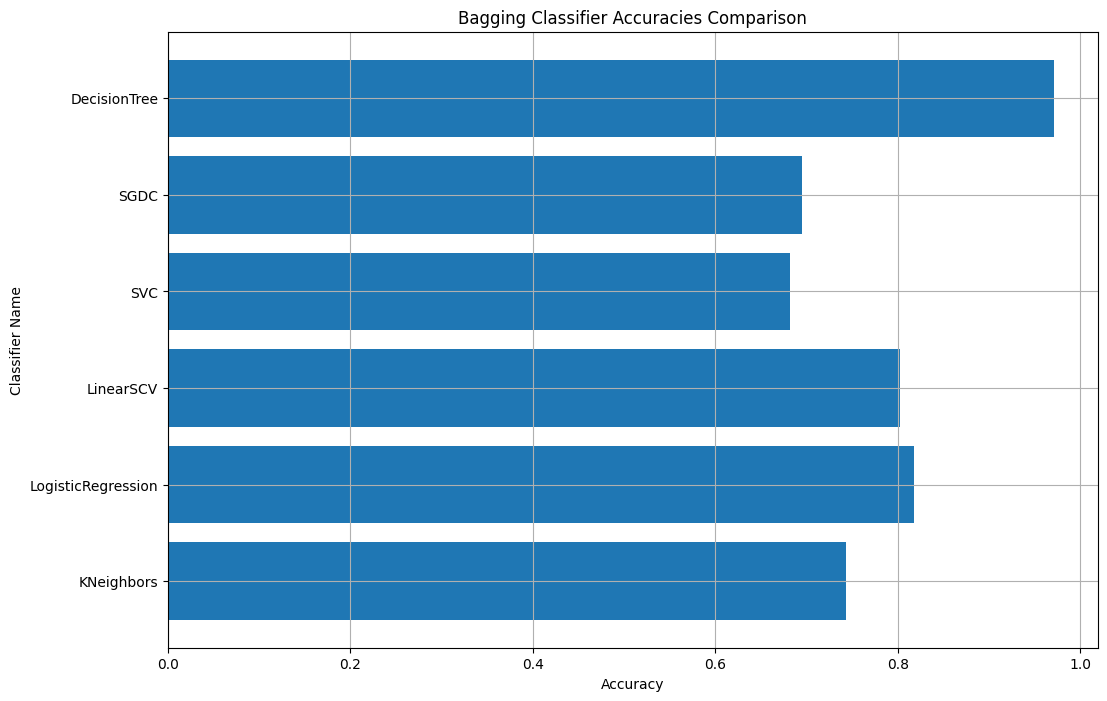

In [6]:
bagging_result = {}

print("Bagging Results:")
for name, estimator in classifiers.items():
    bag_class = BaggingClassifier(estimator=estimator, n_estimators=30)
    bag_class.fit(X_train, y_train)
    y_pred = bag_class.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    bagging_result[name] = acc_score
    print(f"{name}'s Accuracy: {acc_score}")

print("=" * 64)

names = list(bagging_result.keys())
accuracies = list(bagging_result.values())

plt.figure(figsize=(12, 8))
plt.barh(range(len(names)), accuracies, align="center", tick_label=names)
plt.yticks(range(len(names)), names)
plt.xlabel("Accuracy")
plt.ylabel("Classifier Name")
plt.title("Bagging Classifier Accuracies Comparison")
plt.grid()
plt.show()

En general bagging es una gran herramienta que nos permite correr en paralelo varias veces un mismo modelo con la intención de mejorar los resultados que tendría por sí mismo. Esto lo hace a través de un método de unión de resultados como lo puede ser la regla del voto mayoritario.

Los resultados muestran que en general todos los valores de Accuracy de los modelos mejoraron cuando se utilizo Bagging, salvo por el clasificador de DecisionTree el cuál demostro ser igual de eficiente con y sin el uso de Bagging. Sin embargo, podemos ver mejoras realmente sorprendentes al fijarnos en el clasificador Linear y SGDC los cuáles aumentaron considerablemente al usar el método de Bagging.


## Implementación de Boosting

Implementaremos GradientBoostingClassifier un algoritmo boosting basado en arboles de decisión. Podemos encontrar mas información en la documentación oficial de Scikit Learn

Hicimos la implementación con 50 estimadores y obtuvimos lo siguiente:


In [7]:
df_heart = pd.read_csv("../data/heart.csv")
X = df_heart.drop(["target"], axis=1)
y = df_heart["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Con cross validation podemos optimizar la cantidad de estimadores que deberiamos utilizar
boost = GradientBoostingClassifier(n_estimators=50)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print("=" * 64)
print(f"GradientBoostingClassifier Accuracy: {accuracy_score(y_test, boost_pred)}")

GradientBoostingClassifier Accuracy: 0.9285714285714286


In [8]:
score = cross_val_score(boost, X, y, scoring="accuracy", cv=60)
print(score)
print(score.mean())

[1.         0.88888889 0.94444444 0.94444444 1.         0.82352941
 1.         0.94117647 1.         1.         1.         0.94117647
 0.88235294 0.94117647 1.         1.         1.         1.
 0.82352941 0.94117647 0.94117647 1.         0.76470588 0.88235294
 0.88235294 0.94117647 0.88235294 1.         0.94117647 1.
 0.88235294 1.         0.82352941 1.         0.94117647 0.94117647
 0.88235294 0.88235294 0.94117647 0.88235294 0.94117647 0.94117647
 0.94117647 0.94117647 1.         0.94117647 0.94117647 0.94117647
 0.94117647 0.94117647 0.94117647 1.         0.88235294 0.94117647
 0.88235294 0.94117647 0.94117647 1.         0.76470588 1.        ]
0.9374727668845314


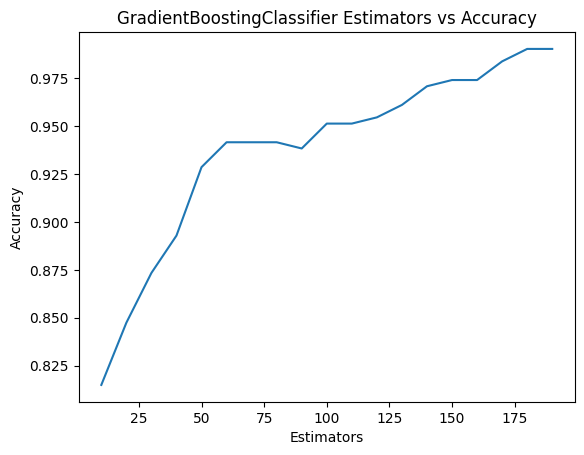

0.9902597402597403


In [11]:
# Graficando
estimators = range(10, 200, 10)
total_accuracy = []

for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i)
    boost.fit(X_train, y_train)
    boost_pred = boost.predict(X_test)
    total_accuracy.append(accuracy_score(y_test, boost_pred))

plt.plot(estimators, total_accuracy)
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("GradientBoostingClassifier Estimators vs Accuracy")
plt.show()
print(np.array(total_accuracy).max())